In [19]:
import random
import copy
import logging
import sys

# from run_tests_201204 import *

import os
import sys
import importlib
from collections import defaultdict
sys.path.insert(0, '/n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc')
from tools_pattern import get_eucledean_dist
import compress_pickle
import my_plot
from my_plot import MyPlotData, my_box_plot
import seaborn as sns

script_n = 'plot_210626_stdev_global'

data_script = 'batch_210626_stdev_global_random'
db_path = '/n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc/dimensionality_sim2/' \
            f'{data_script}/'


scaled_noise = 0
core_noise = 0
n_mfs = 497
n_grcs = 1847*8

pattern_type = 'binary'
db = {}

# for model in ['observed', 'local_random', 'global_random']:
for model in ['global_random']:
    for scale in [.5]:
        for fail in [1.0, .5]:
            model_name = f'{model}_{scale}_{fail}'
            db[model_name] = compress_pickle.load(
                db_path + \
                    f'{data_script}_{model}_{pattern_type}_{n_grcs}_{n_mfs}_'
                    f'scale_{scale}_fail_{fail}_'
                    f'0.3_512_40.gz')


In [3]:
db.keys()

dict_keys(['global_random_0.5_1.0', 'global_random_0.5_0.5'])

Height: 3.7593984962406015, Aspect: 1.33


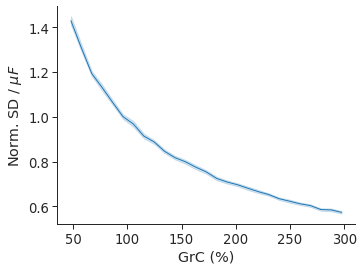

In [21]:

name_map = {
        'observed_1.0': "Observed",
        'observed_0.5': "w/ half GrC-PC conn.",
}

palette = {
#     name_map['scaleup4']: sns.color_palette()[0],
#     name_map['global_random']: sns.color_palette()[1],
#     name_map['random']: sns.color_palette()[1],
#     name_map['local_random']: sns.color_palette()[2],
}


mpd = MyPlotData()
# ress_ref = db['local_random'][0][0]
# resss_ref2 = db['local_random'][0]
for model_name in [
#         'global_random_0.5_1.0',
        'global_random_0.5_0.5',
        ]:
    resss = db[model_name]
    ress_tries = resss[0]  # get the first element in tuple
#     ress = ress[0]  # get the first try
    for n_try, ress in enumerate(ress_tries):
#         print(resss_ref2[0])
#         print(resss_ref2.keys())
#         if n_try >= len(resss_ref2):
#             print(n_try)
#             continue
#         ress_ref2 = resss_ref2[n_try]
#         noise = .3
#         for noise in ress:
    #         print(noise)
        for noise in ress:
            res = ress[noise]
            grc_dim2 = 1/res['grc_pop_corr']
            grc_pct = noise*100*8
            if grc_pct < 40:
                continue
            if grc_pct > 300:
                continue
            mpd.add_data_point(
#                 model=name_map[model_name],
                model=model_name,
                grc_pct=grc_pct,
                grc_dim=res['grc_dim'],
                grc_dim_norm=res['grc_dim']/79,
                grc_dim2=grc_dim2,
                grc_dim2_norm=grc_dim2/72,
                grc_by_mf_dim=res['grc_dim']/res['mf_dim'],
                num_grcs=res['num_grcs'],
                num_mfs=res['num_mfs'],
                voi=res['voi'],
                grc_pop_corr=res['grc_pop_corr'],
                binary_similarity=res['binary_similarity'],
                hamming_distance=res['hamming_distance'],
                normalized_mse=res['normalized_mse'],
#                 grc_stdev_pct=1/res['grc_stdev_pct'],
                grc_stdev_pct=res['grc_stdev_pct'],
                grc_stdev_pct_norm=res['grc_stdev_pct'] / 0.071,
                )

importlib.reload(my_plot); my_plot.my_relplot(
    mpd,
    x='grc_pct',
    y='grc_stdev_pct_norm',
    hue='model',
    context='paper',
#     palette=palette,
    linewidth=1,
#     log_scale_y=True,
    width=5,
#     ylim=[0, None],
    y_axis_label='Norm. SD / $\mu F$',
    x_axis_label='GrC (%)',
#     title='noise',
    legend=None,
    save_filename=f'{script_n}_1823.svg',
    show=True,
    )


Height: 3.7593984962406015, Aspect: 1.33


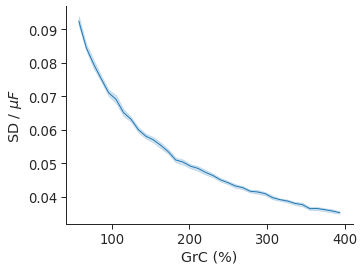

In [18]:

name_map = {
        'observed_1.0': "Observed",
        'observed_0.5': "w/ half GrC-PC conn.",
}

palette = {
#     name_map['scaleup4']: sns.color_palette()[0],
#     name_map['global_random']: sns.color_palette()[1],
#     name_map['random']: sns.color_palette()[1],
#     name_map['local_random']: sns.color_palette()[2],
}


mpd = MyPlotData()
# ress_ref = db['local_random'][0][0]
# resss_ref2 = db['local_random'][0]
for model_name in [
#         'global_random_0.5_1.0',
        'global_random_0.5_0.5',
        ]:
    resss = db[model_name]
    ress_tries = resss[0]  # get the first element in tuple
#     ress = ress[0]  # get the first try
    for n_try, ress in enumerate(ress_tries):
#         print(resss_ref2[0])
#         print(resss_ref2.keys())
#         if n_try >= len(resss_ref2):
#             print(n_try)
#             continue
#         ress_ref2 = resss_ref2[n_try]
#         noise = .3
#         for noise in ress:
    #         print(noise)
        for noise in ress:
            res = ress[noise]
            grc_dim2 = 1/res['grc_pop_corr']
            grc_pct = noise*100*8
            if grc_pct < 50:
                continue
            if grc_pct > 400:
                continue
            mpd.add_data_point(
#                 model=name_map[model_name],
                model=model_name,
                grc_pct=grc_pct,
                grc_dim=res['grc_dim'],
                grc_dim_norm=res['grc_dim']/79,
                grc_dim2=grc_dim2,
                grc_dim2_norm=grc_dim2/72,
                grc_by_mf_dim=res['grc_dim']/res['mf_dim'],
                num_grcs=res['num_grcs'],
                num_mfs=res['num_mfs'],
                voi=res['voi'],
                grc_pop_corr=res['grc_pop_corr'],
                binary_similarity=res['binary_similarity'],
                hamming_distance=res['hamming_distance'],
                normalized_mse=res['normalized_mse'],
#                 grc_stdev_pct=1/res['grc_stdev_pct'],
                grc_stdev_pct=res['grc_stdev_pct'],
                grc_stdev_pct_norm=res['grc_stdev_pct'] / 0.071,
                )

importlib.reload(my_plot); my_plot.my_relplot(
    mpd,
    x='grc_pct',
    y='grc_stdev_pct',
    hue='model',
    context='paper',
#     palette=palette,
    linewidth=1,
#     log_scale_y=True,
    width=5,
#     ylim=[0, None],
    y_axis_label='SD / $\mu F$',
    x_axis_label='GrC (%)',
#     title='noise',
    legend=None,
    save_filename=f'{script_n}_1828.svg',
    show=True,
    )
